In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
conn = sqlite3.connect('./sqlite/fire_incidents.sqlite')

# Features for NFIRS property loss

### State
I expect State will be interesting because some states like California or New York will likely have high residential values for homes on average, but states like Arkansas and Missouri will have comparatively low real estate values.  Let's see if the box plots for property loss by state are interesting.

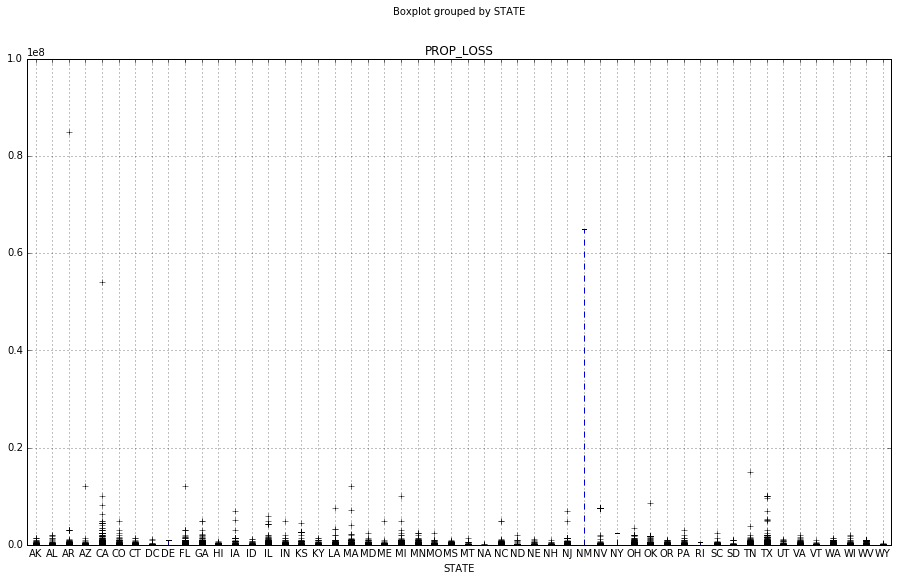

In [11]:
state_frame = pd.read_sql_query("select STATE, PROP_LOSS from incidents where PROP_LOSS IS NOT NULL", conn)
state_frame[['PROP_LOSS']] = state_frame[['PROP_LOSS']].apply(pd.to_numeric)
plot = state_frame.boxplot(column="PROP_LOSS", by="STATE", figsize=(15,9))

There is certainly some variation here.  CA, TX, MA, and FL are noticable states with higher loss values, but I'm not convinced it's _very_ useful yet.  I might include it, especially if we're doing a decision tree, but I think it will pay to look at some other features first.

### Incident Type
The next few columns I don't think are worth exploring.  the ID of the fire department, the date, the sequential number, NFIRS version, and station number; I'd have a hard time tying a reasonable relationship to any of those.  Incident type, though, may have promise.  Unfortunately, there are 66 unique values in the dataset.  That doesn't seem great as is, being able to group them would be useful.  There are some natural groupings that NFIRS provides in their heirarchical coding, but the grouping isn't really symetrical.  Some of the divisions inside the "100" groups are relevant (building fire vs vehical fire vs rubbish fire), but we can probably safely group anything in the 400s, 500s, or 600s together for the purposes of this analysis.  I think for anything with a "1" at the front we'll group by the second digit, but anything with >1 will be grouped by the first digit.

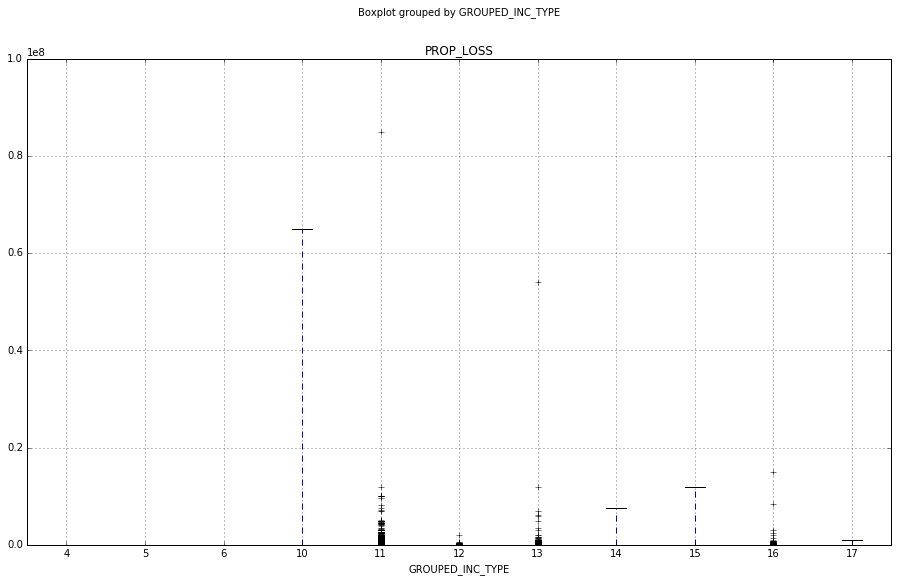

In [12]:
def map_inc_type(input_type):
    if input_type[0] == u"1":
        return int(input_type[0:2])
    else:
        return int(input_type[0])

inc_frame = pd.read_sql_query("select INC_TYPE, PROP_LOSS from incidents where PROP_LOSS IS NOT NULL", conn)

inc_frame['GROUPED_INC_TYPE'] = inc_frame['INC_TYPE'].map(lambda x: map_inc_type(x))
inc_frame[['PROP_LOSS']] = inc_frame[['PROP_LOSS']].apply(pd.to_numeric)

plot = inc_frame.boxplot(column="PROP_LOSS", by="GROUPED_INC_TYPE", figsize=(15,9))